In [21]:
import torch
from torch_geometric.data import Data
import os

data = torch.load(r"/home/william/Documents/DTU/GraphML_Bachelorprojekt/dataset/ogbn_mag/processed/geometric_data_processed.pt")


paper_data = data
print(paper_data)

/tmp/ipykernel_57904/577591149.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(r"/home/william/Documents/DTU/GraphML_Bachelorprojekt/dataset/ogbn_mag/p

(Data(
  num_nodes_dict={
    author=1134649,
    field_of_study=59965,
    institution=8740,
    paper=736389,
  },
  edge_index_dict={
    (author, affiliated_with, institution)=[2, 1043998],
    (author, writes, paper)=[2, 7145660],
    (paper, cites, paper)=[2, 5416271],
    (paper, has_topic, field_of_study)=[2, 7505078],
  },
  x_dict={ paper=[736389, 128] },
  node_year={ paper=[736389, 1] },
  edge_reltype={
    (author, affiliated_with, institution)=[1043998, 1],
    (author, writes, paper)=[7145660, 1],
    (paper, cites, paper)=[5416271, 1],
    (paper, has_topic, field_of_study)=[7505078, 1],
  },
  y_dict={ paper=[736389, 1] }
), None)


/tmp/ipykernel_57904/409825380.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data, _ = torch.load(r"/home/william/Documents/DTU/GraphML_Bachelorprojekt/dataset/ogbn_ma

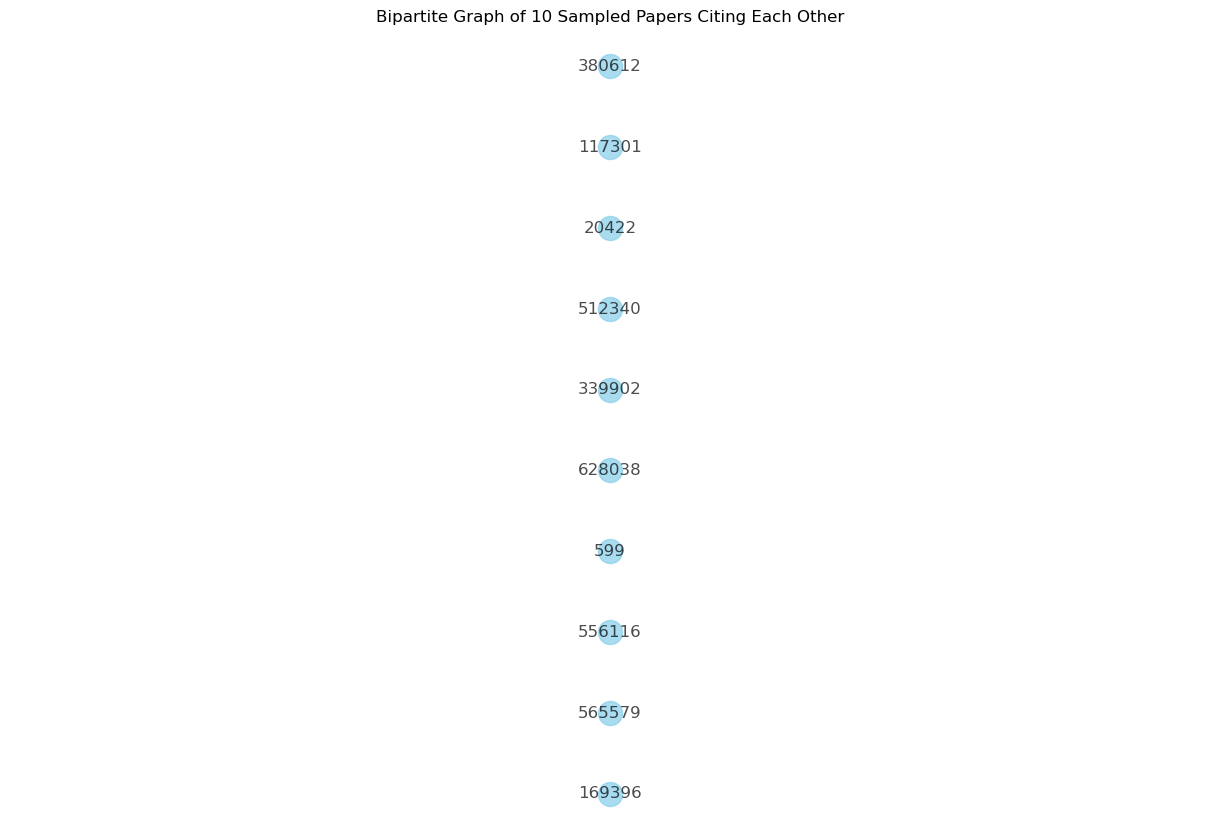

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import random

# Load the data (assuming it's already loaded in `data`)
data, _ = torch.load(r"/home/william/Documents/DTU/GraphML_Bachelorprojekt/dataset/ogbn_mag/processed/geometric_data_processed.pt")

# Extract the edge index for the 'paper' citing 'paper' relationship
paper_cites_edge_index = data.edge_index_dict[('paper', 'cites', 'paper')]

# Select 10 random papers that cite each other (we'll sample pairs that cite each other)
num_samples = 10
paper_ids = torch.unique(paper_cites_edge_index)  # Get all unique paper IDs

# Sample 10 papers randomly from the unique papers
sampled_papers = random.sample(list(paper_ids.numpy()), num_samples)

# Find the citations between the sampled papers
citation_edges = []
for i in range(num_samples):
    for j in range(i + 1, num_samples):
        if (sampled_papers[i], sampled_papers[j]) in zip(paper_cites_edge_index[0].numpy(), paper_cites_edge_index[1].numpy()):
            citation_edges.append((sampled_papers[i], sampled_papers[j]))
        elif (sampled_papers[j], sampled_papers[i]) in zip(paper_cites_edge_index[0].numpy(), paper_cites_edge_index[1].numpy()):
            citation_edges.append((sampled_papers[j], sampled_papers[i]))

# Create the bipartite graph
B = nx.Graph()
B.add_nodes_from(sampled_papers)

# Add edges between papers (citations)
B.add_edges_from(citation_edges)

# Create a bipartite layout (same papers in two sets)
pos = {}
for i, paper in enumerate(sampled_papers):
    # Position papers on the left (column 0)
    pos[paper] = (0, i)
    # Position the same papers on the right (column 1)
    pos[paper] = (1, i)

# Draw the graph
plt.figure(figsize=(12, 8))

# Draw nodes and edges using the custom positions
nx.draw(B, pos, with_labels=True, node_size=300, edge_color='gray', node_color='skyblue', alpha=0.7)

# Show plot
plt.title("Bipartite Graph of 10 Sampled Papers Citing Each Other")
plt.show()
